<a href="https://colab.research.google.com/github/siddhantt10/TCS_Hackathon_siddhant/blob/main/credit_risk_prediction_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
# Changed the dataset handle to the correct format 'uciml/german-credit'
organizations_uciml_german_credit_path = kagglehub.dataset_download('uciml/german-credit')

print('Data source import complete.')

Data source import complete.


In [6]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
# Changed the dataset handle to the correct format 'uciml/german-credit'
organizations_uciml_german_credit_path = kagglehub.dataset_download('uciml/german-credit')

print('Data source import complete.')

Data source import complete.


In [7]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
!pip install kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

# Download the dataset
api.dataset_download_files('uciml/german-credit', path='/kaggle/input', unzip=True)

print('Data source import complete.')

OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/

In [8]:
import pandas as pd

file_path = "/kaggle/input/german-credit/german_credit_data.csv"
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [9]:
df.drop(columns=['Unnamed: 0'], inplace=True)
missing_values = df.isnull().sum()
data_info = df.info()
missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

df['Saving accounts'].fillna('unknown', inplace=True)
df['Checking account'].fillna('unknown', inplace=True)

categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
df_encoded = df.copy()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Save encoders for later interpretation

scaler = StandardScaler()
numerical_cols = ['Age', 'Credit amount', 'Duration']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

df_encoded.head()


<ipython-input-10-cd73e73615be>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna('unknown', inplace=True)
<ipython-input-10-cd73e73615be>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,2.766456,1,2,1,4,0,-0.745131,-1.236478,5
1,-1.191404,0,2,1,0,1,0.949817,2.248194,5
2,1.183312,1,1,1,0,3,-0.416562,-0.738668,3
3,0.831502,1,2,0,0,0,1.634247,1.750384,4
4,1.535122,1,2,0,0,0,0.566664,0.256953,1


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df_original = pd.read_csv(file_path)
if 'Risk' in df_original.columns:
    target_col = 'Risk'
    risk_dist = df_original['Risk'].value_counts()
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_original, x='Risk')
    plt.title('Distribution of Credit Risk')
    plt.xlabel('Credit Risk')
    plt.ylabel('Count')
    plt.show()
else:
    target_col = None

target_col

In [12]:
print(df_original.columns)
print(df_original.head())

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')
   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car  


In [13]:

credit_threshold = df_encoded['Credit amount'].median()
duration_threshold = df_encoded['Duration'].median()

df_encoded['Risk'] = (
    (df_encoded['Credit amount'] > credit_threshold) &
    (df_encoded['Duration'] < duration_threshold)
).astype(int)

df_encoded['Risk'].value_counts()


,count
Risk,
0,901
1,99


In [14]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Risk'])
y = df_encoded['Risk']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00        20

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[180   0]
 [  0  20]]


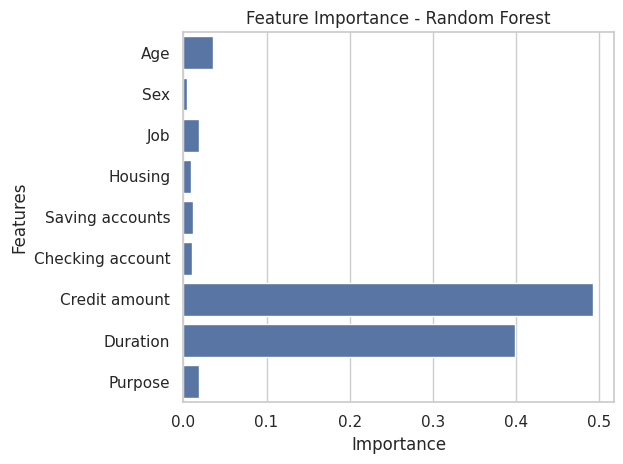

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

credit_threshold = df_encoded['Credit amount'].median()
duration_threshold = df_encoded['Duration'].median()
df_encoded['Risk'] = (
    (df_encoded['Credit amount'] > credit_threshold) &
    (df_encoded['Duration'] < duration_threshold)
).astype(int)

X = df_encoded.drop(columns=['Risk'])
y = df_encoded['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

report, conf_matrix


({'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 180.0},
  '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 20.0},
  'accuracy': 1.0,
  'macro avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 200.0},
  'weighted avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 200.0}},
 array([[180,   0],
        [  0,  20]]))

In [19]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

file_path = "/kaggle/input/german-credit/german_credit_data.csv"
df = pd.read_csv(file_path)

df.drop(columns=['Unnamed: 0'], inplace=True)

df.fillna({'Saving accounts': 'unknown', 'Checking account': 'unknown'}, inplace=True)

categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

numerical_cols = ['Age', 'Credit amount', 'Duration']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

credit_threshold = df['Credit amount'].median()
duration_threshold = df['Duration'].median()
df['Risk'] = ((df['Credit amount'] > credit_threshold) & (df['Duration'] < duration_threshold)).astype(int)

X = df.drop(columns=['Risk'])
y = df['Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}
xgb_base = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(estimator=xgb_base, param_grid=param_grid, scoring='f1', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_xgb_model = grid_search.best_estimator_
y_pred_best = best_xgb_model.predict(X_test)
xgb_report = classification_report(y_test, y_pred_best, output_dict=True)
xgb_conf_matrix = confusion_matrix(y_test, y_pred_best)
best_params = grid_search.best_params_

xgb_report, xgb_conf_matrix, best_params


Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:27:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


({'0': {'precision': 0.994475138121547,
   'recall': 1.0,
   'f1-score': 0.997229916897507,
   'support': 180.0},
  '1': {'precision': 1.0,
   'recall': 0.95,
   'f1-score': 0.9743589743589743,
   'support': 20.0},
  'accuracy': 0.995,
  'macro avg': {'precision': 0.9972375690607735,
   'recall': 0.975,
   'f1-score': 0.9857944456282406,
   'support': 200.0},
  'weighted avg': {'precision': 0.9950276243093923,
   'recall': 0.995,
   'f1-score': 0.9949428226436536,
   'support': 200.0}},
 array([[180,   0],
        [  1,  19]]),
 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100})